In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import gdown
import pandas as pd

# Updated file ID for the new dataset from your link
file_id = '1Hze1lgYT6RDfI12hIXaf7HReHxpdiXNm'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'Merged.csv'
gdown.download(url, output=output_file, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe
print(data.head())

# Create a copy of the dataframe
df = data.copy()


Downloading...
From: https://drive.google.com/uc?id=1Hze1lgYT6RDfI12hIXaf7HReHxpdiXNm
To: /content/Merged.csv
100%|██████████| 2.21M/2.21M [00:00<00:00, 58.1MB/s]


   Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0    1011601  23.0  Female       Chinese         Single                 16.0   
1      10786  34.0  Female  Asian Indian        Married                 17.0   
2      10809  28.0    Male  Asian Indian        Married                 17.0   
3      10856  25.0    Male  Asian Indian         Single                 17.0   
4      10103  60.0  Female  Asian Indian         Single                 17.0   

   Household Size Household Category Full Time Employment  \
0             3.0             Family                   No   
1             3.0             Family                  Yes   
2             2.0             Family                  Yes   
3             1.0              Alone                  Yes   
4             3.0             Family                   No   

  Part Time Employment  ...             Informed  \
0                   No  ...       Not interested   
1                   No  ...  Somewhat interested

In [3]:
#df = pd.read_csv('Merged.csv')

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
df.head()

Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0    1011601  23.0  Female       Chinese         Single                 16.0   
1      10786  34.0  Female  Asian Indian        Married                 17.0   
2      10809  28.0    Male  Asian Indian        Married                 17.0   
3      10856  25.0    Male  Asian Indian         Single                 17.0   
4      10103  60.0  Female  Asian Indian         Single                 17.0   

   Household Size Household Category Full Time Employment  \
0             3.0             Family                   No   
1             3.0             Family                  Yes   
2             2.0             Family                  Yes   
3             1.0              Alone                  Yes   
4             3.0             Family                   No   

  Part Time Employment Student Homemaker Retired             Income US Born  \
0                   No      No        No      No        $0 - $9,999      No   
1                   No      No        No      No   $70,000 and over      No   
2                   No      No        No      No   $70,000 and over      No   
3                   No      No        No      No  $50,000 - $59,999      No   
4                   No      No        No     Yes   $70,000 and over      No   

   Duration of Residency Primary Language English Speaking  \
0                   11.0              Yes             Well   
1                    1.0              Yes        Very well   
2                    7.0               No             Well   
3                    2.0               No        Very well   
4                   47.0              Yes        Very well   

  English Difficulties Familiarity with America  \
0                 Much                      Low   
1           Not at all                Very high   
2                 Much                     High   
3           Not at all                Very high   
4           Not at all                      Low   

  Familiarity with Ethnic Origin Identify Ethnically      Belonging  \
0                      Very high          Very close  Not very much   
1                           High          Very close      Very much   
2                           High      Somewhat close  Not very much   
3                            Low      Not very close  Not very much   
4                           High      Not very close  Not very much   

  Discrimination  Present Health Present Mental Health Present Oral Health  \
0              No      Very Good                  Good                Good   
1              No      Excellent             Excellent           Excellent   
2              No      Very Good             Very Good           Very Good   
3              No      Excellent             Excellent           Excellent   
4              No           Good             Excellent           Very Good   

  Hygiene Assistance Smoking Drinking Regular Exercise Healthy Diet  \
0                 No      No       No               No          Yes   
1                Yes      No       No              Yes          Yes   
2                 No      No       No              Yes           No   
3                 No     Yes       No              Yes          Yes   
4                 No      No       No              Yes          Yes   

  Hypertension Heart Disease Stroke Diabetes Cancer Arthritis Hepatitis  \
0            0            No     No        0     No         0        No   
1            0            No     No        0     No         0        No   
2            0            No     No        0     No         0        No   
3            0            No     No        0     No         0        No   
4            0            No     No        0     No       Yes        No   

  Kidney Problem Asthma COPD Physical Check-up Dentist Check-up Urgentcare  \
0             No     No   No               Yes                0          0   
1             No     No   No               Yes              Yes       

In [6]:
df.head()

Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0    1011601  23.0  Female       Chinese         Single                 16.0   
1      10786  34.0  Female  Asian Indian        Married                 17.0   
2      10809  28.0    Male  Asian Indian        Married                 17.0   
3      10856  25.0    Male  Asian Indian         Single                 17.0   
4      10103  60.0  Female  Asian Indian         Single                 17.0   

   Household Size Household Category Full Time Employment  \
0             3.0             Family                   No   
1             3.0             Family                  Yes   
2             2.0             Family                  Yes   
3             1.0              Alone                  Yes   
4             3.0             Family                   No   

  Part Time Employment Student Homemaker Retired             Income US Born  \
0                   No      No        No      No        $0 - $9,999      No   
1                   No      No        No      No   $70,000 and over      No   
2                   No      No        No      No   $70,000 and over      No   
3                   No      No        No      No  $50,000 - $59,999      No   
4                   No      No        No     Yes   $70,000 and over      No   

   Duration of Residency Primary Language English Speaking  \
0                   11.0              Yes             Well   
1                    1.0              Yes        Very well   
2                    7.0               No             Well   
3                    2.0               No        Very well   
4                   47.0              Yes        Very well   

  English Difficulties Familiarity with America  \
0                 Much                      Low   
1           Not at all                Very high   
2                 Much                     High   
3           Not at all                Very high   
4           Not at all                      Low   

  Familiarity with Ethnic Origin Identify Ethnically      Belonging  \
0                      Very high          Very close  Not very much   
1                           High          Very close      Very much   
2                           High      Somewhat close  Not very much   
3                            Low      Not very close  Not very much   
4                           High      Not very close  Not very much   

  Discrimination  Present Health Present Mental Health Present Oral Health  \
0              No      Very Good                  Good                Good   
1              No      Excellent             Excellent           Excellent   
2              No      Very Good             Very Good           Very Good   
3              No      Excellent             Excellent           Excellent   
4              No           Good             Excellent           Very Good   

  Hygiene Assistance Smoking Drinking Regular Exercise Healthy Diet  \
0                 No      No       No               No          Yes   
1                Yes      No       No              Yes          Yes   
2                 No      No       No              Yes           No   
3                 No     Yes       No              Yes          Yes   
4                 No      No       No              Yes          Yes   

  Hypertension Heart Disease Stroke Diabetes Cancer Arthritis Hepatitis  \
0            0            No     No        0     No         0        No   
1            0            No     No        0     No         0        No   
2            0            No     No        0     No         0        No   
3            0            No     No        0     No         0        No   
4            0            No     No        0     No       Yes        No   

  Kidney Problem Asthma COPD Physical Check-up Dentist Check-up Urgentcare  \
0             No     No   No               Yes                0          0   
1             No     No   No               Yes              Yes       

In [7]:
df.shape

(2565, 148)

In [8]:
df.drop(columns='Survey ID',axis=1, inplace=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Completed',
       'Household Size', 'Household Category', 'Full Time Employment',
       'Part Time Employment', 'Student',
       ...
       'Informed', 'City Effort Satisfaction', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Mode of Transport',
       'Awareness of Services', 'Civic Engagement', 'Quality of Life'],
      dtype='object', length=147)

In [10]:
df_num = df.select_dtypes(include=['int64','float64']).columns

In [11]:
df_num

Index(['Age', 'Education Completed', 'Household Size', 'Duration of Residency',
       'Knowledge', 'Education (AD)', 'Services (AD)', 'Language Barrier (AD)',
       'Aging (AD)', 'Avoidance (AD)', 'Nursing Home (AD)',
       'Advanced Directives', 'Have an Advanced Directive', 'Superstition',
       'Concern for Self & Others (AD)', 'Planning and Preparedness',
       'Fate (AD) and Embarrassing (AD)', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ',
       '3-1-1_9-1-1', 'City-based', 'Non-city-based Ethnic',
       'Non-city-based General', 'Quality of Life'],
      dtype='object')

In [12]:
df_num = ['Age', 'Education Completed', 'Household Size',
       'Duration of Residency', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ']

In [13]:
# Convert all columns except those in df_num to categorical
for col in df.columns:
    if col not in df_num:
        df[col] = df[col].astype('object')

# Check if conversion was successful
print(df.dtypes)


Age                       float64
Gender                     object
Ethnicity                  object
Marital Status             object
Education Completed       float64
                           ...   
Non-city-based General     object
Mode of Transport          object
Awareness of Services      object
Civic Engagement           object
Quality of Life            object
Length: 147, dtype: object


In [14]:
df_cat = df.select_dtypes(include=['object','category']).columns


In [15]:
for i in df_cat:
    print(df[i].value_counts())
    print('\n')


Gender
Female    1421
Male      1144
Name: count, dtype: int64


Ethnicity
Chinese         630
Asian Indian    568
Vietnamese      495
Korean          467
Filipino        262
Other           143
Name: count, dtype: int64


Marital Status
Married                  1717
Single                    717
Living with a partner     102
Other                      29
Name: count, dtype: int64


Household Category
Family                 2035
With Friends            235
Alone                   208
Other                    69
Family with Friends      18
Name: count, dtype: int64


Full Time Employment
No     1435
Yes    1130
Name: count, dtype: int64


Part Time Employment
No     2303
Yes     262
Name: count, dtype: int64


Student
No     2168
Yes     397
Name: count, dtype: int64


Homemaker
No     2310
Yes     255
Name: count, dtype: int64


Retired
No     2247
Yes     318
Name: count, dtype: int64


Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,

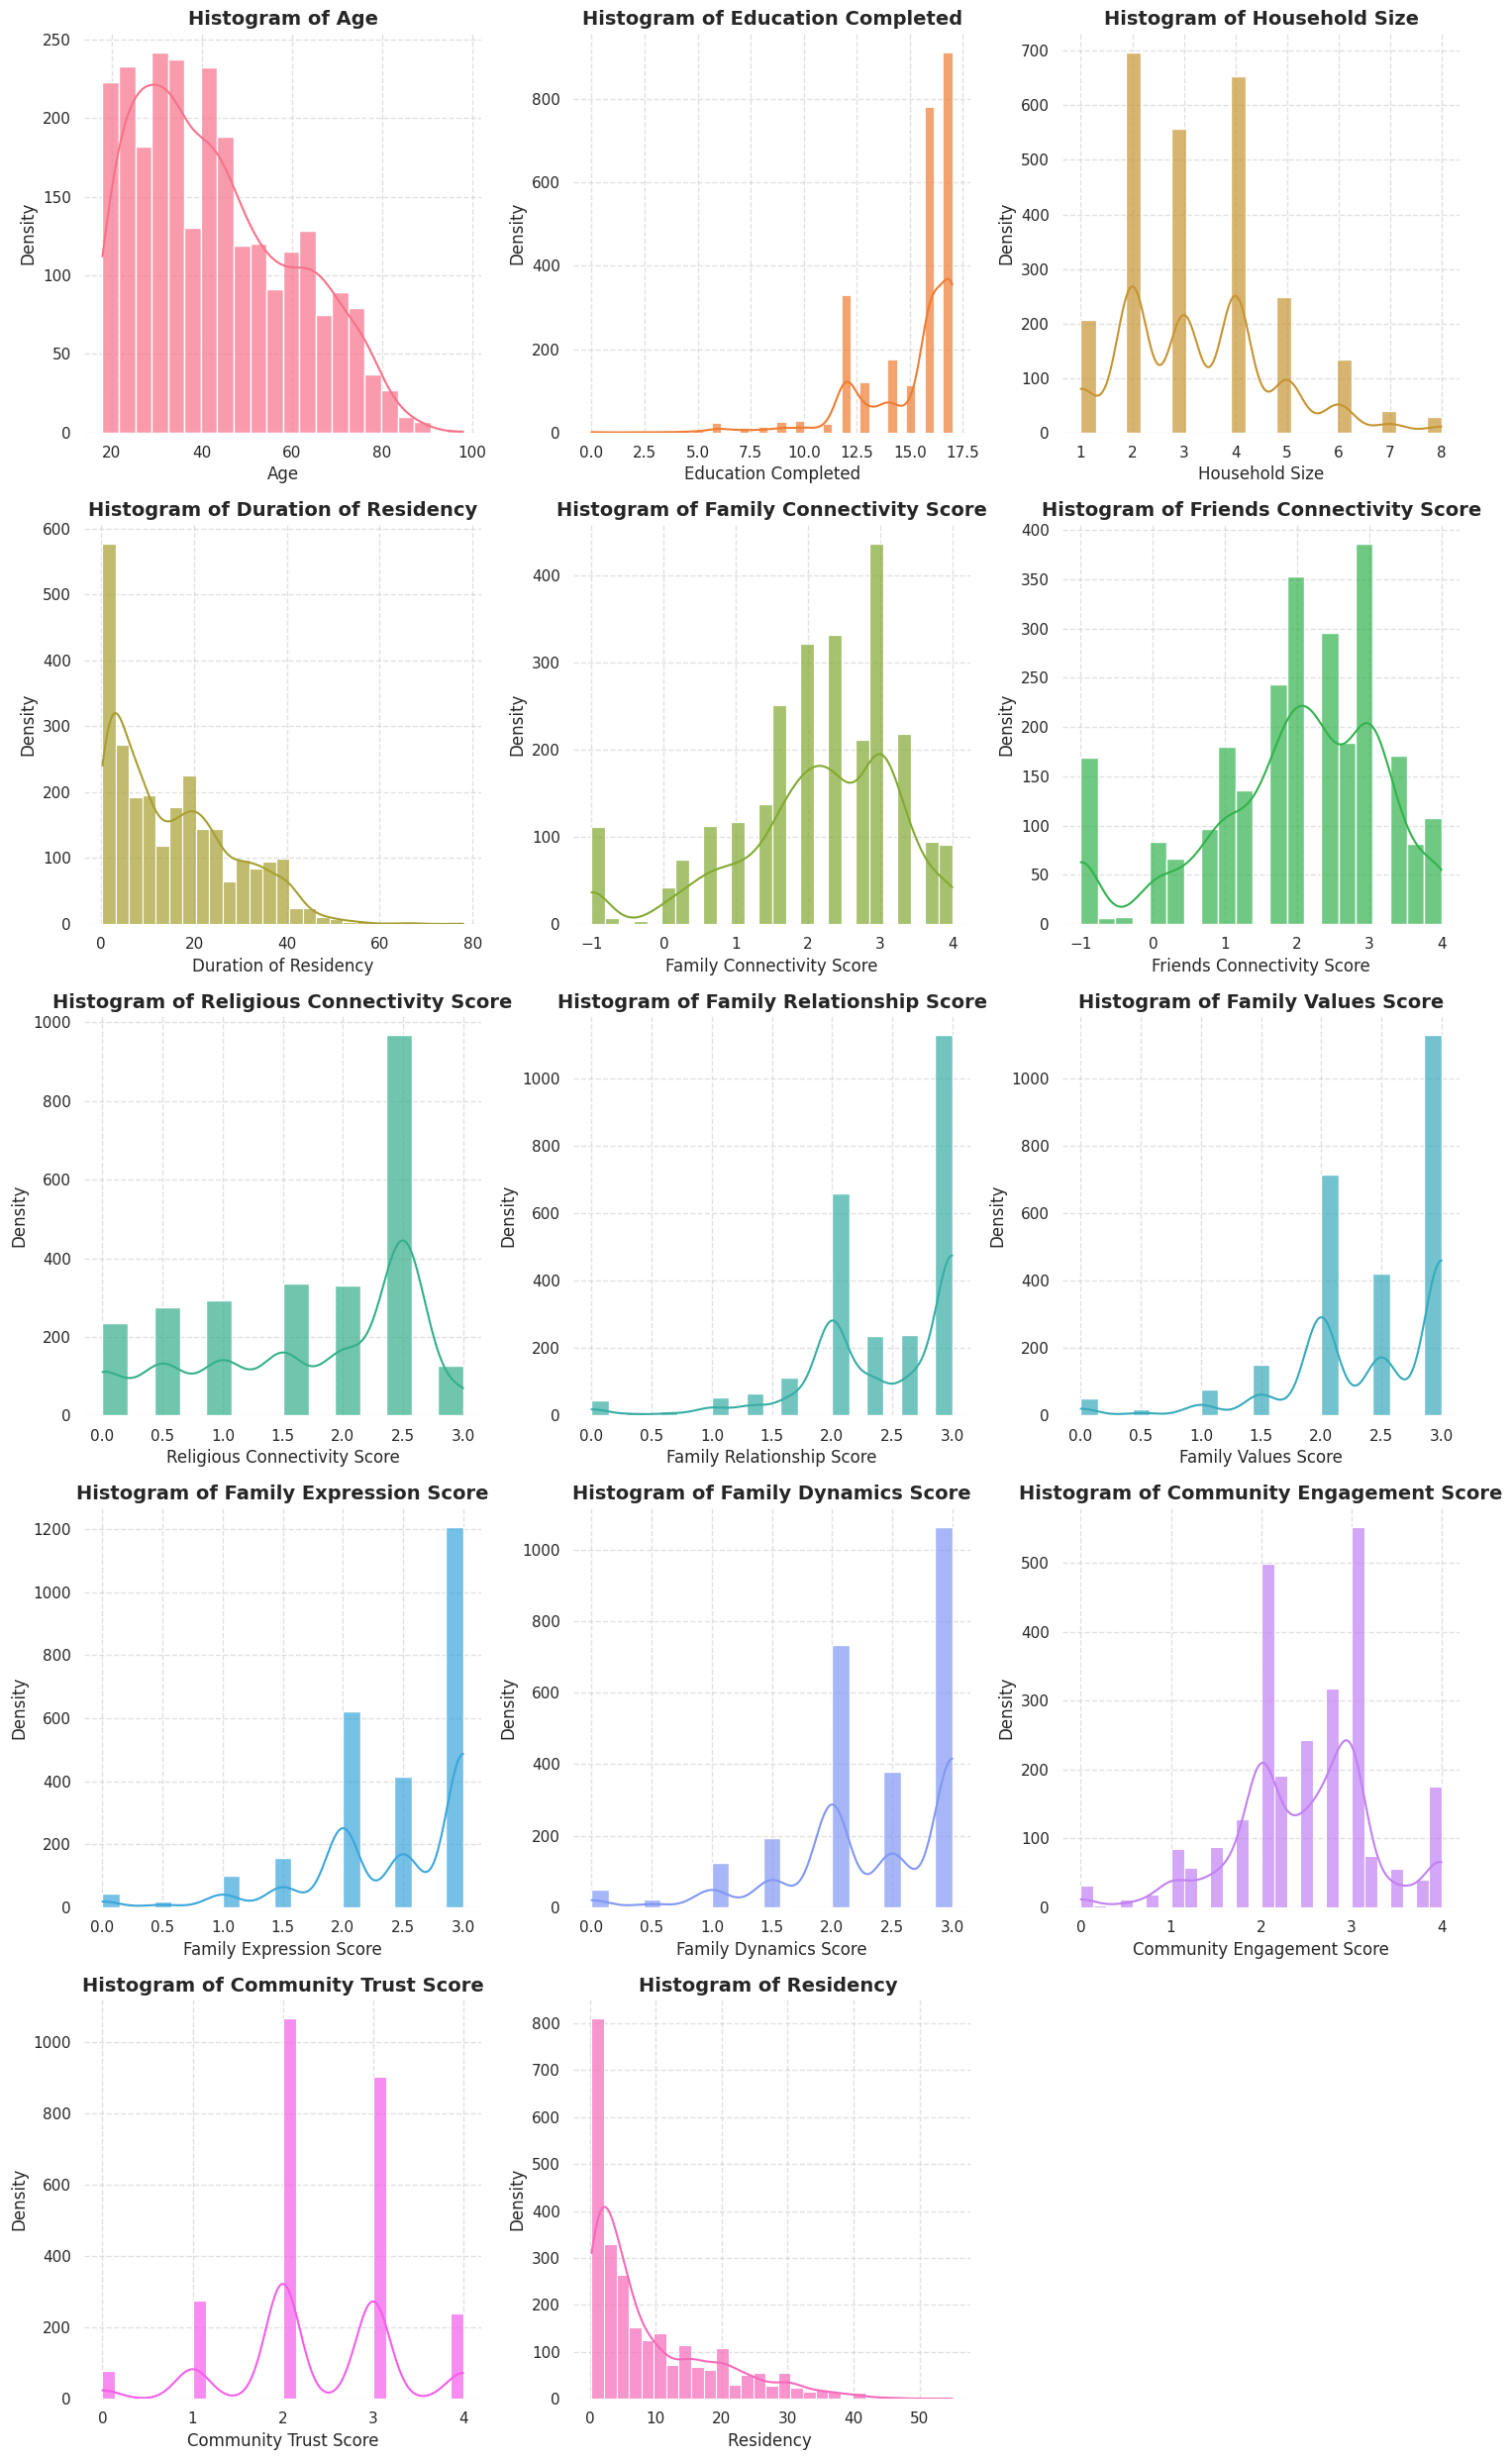

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style='whitegrid')  # Use a clean white background with gridlines
palette = sns.color_palette("husl", len(df_num))  # Set a nice color palette (you can choose other palettes too)

n_cols = 3  # Number of plots per row
n_rows = (len(df_num) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Create subplots grid
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each numerical column
for i, col in enumerate(df_num):
    sns.histplot(df[col], fill=True, kde=True, color=palette[i], ax=axes[i], alpha=0.7)  # Set transparency and KDE
    axes[i].set_title(f'Histogram of {col}', fontsize=14, fontweight='bold')  # Bold and larger titles
    axes[i].set_xlabel(col, fontsize=12)  # Larger x-axis labels
    axes[i].set_ylabel('Density', fontsize=12)  # Larger y-axis labels
    axes[i].grid(True, linestyle='--', alpha=0.6)  # Add gridlines with transparency
    sns.despine(left=True, bottom=True)  # Remove the spines for cleaner plots

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



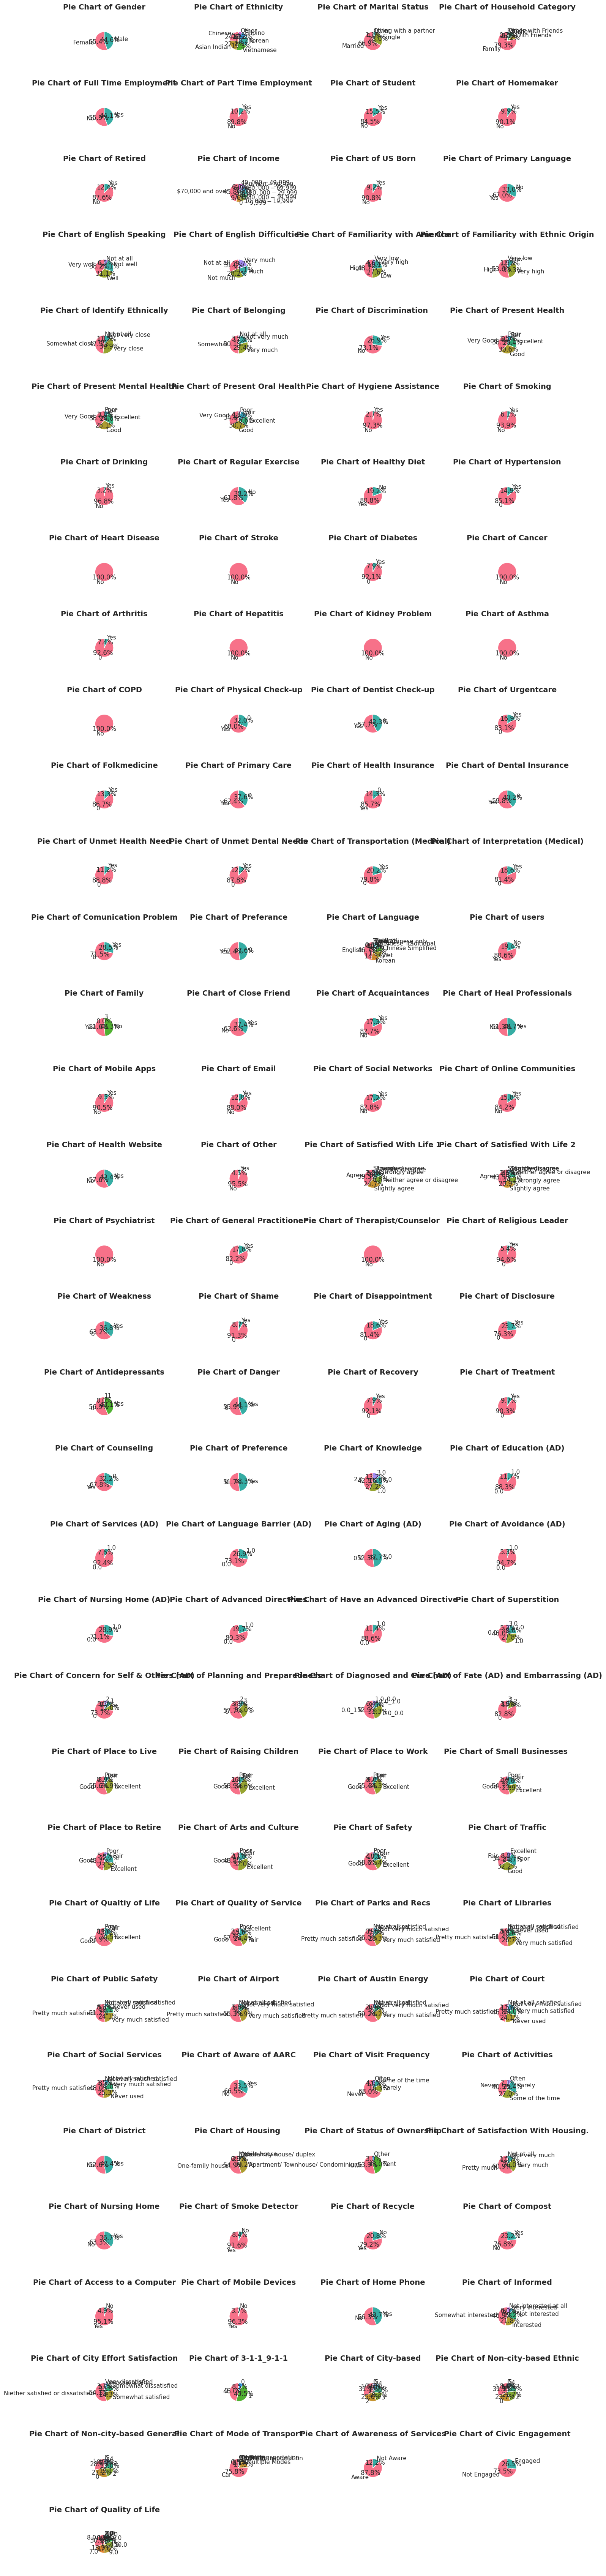

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame
categorical_columns = df.select_dtypes(include=['category', 'object']).columns  # Get categorical columns from df

n_cols = 4  # Number of plots per row
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2))  # Create subplots grid
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each categorical column as a pie chart
for i, col in enumerate(categorical_columns):
    values = df[col].value_counts()  # Get the counts of each category in the column
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(values)))
    axes[i].set_title(f'Pie Chart of {col}', fontsize=14, fontweight='bold')  # Bold and larger titles
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [18]:
len(df_cat) + len(df_num)

147

## RESPONSE VARIABLE

In [19]:
y = df['Quality of Life']

In [20]:
class_counts = y.value_counts()
class_counts

Quality of Life
8.0     783
7.0     486
9.0     435
10.0    344
6.0     218
5.0     211
4.0      48
3.0      23
2.0      11
1.0       4
0.0       2
Name: count, dtype: int64

<ipython-input-21-bd342538deb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


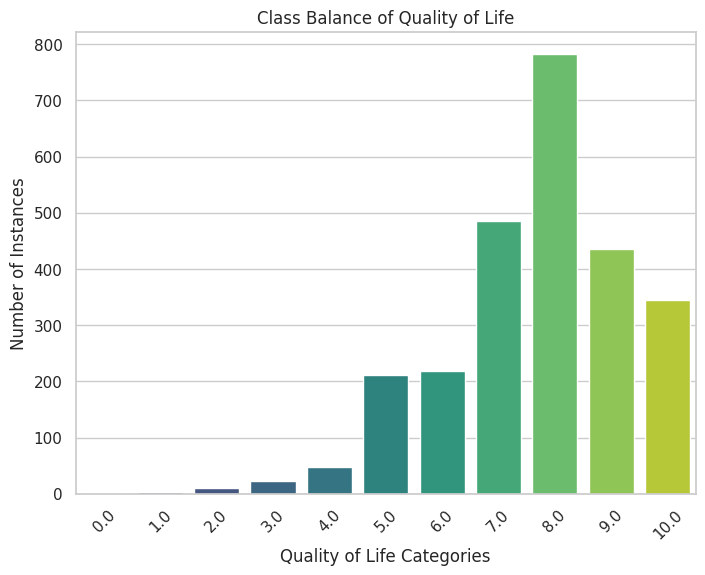

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Balance of Quality of Life')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

#Encode type I
Yes
No  

#Encode type II
Pretty much satisfied     
Very much satisfied        
Not very much satisfied     
Never used                 
Not at all satisfied        

#Encode type III
Never               
Rarely              
Some of the time     
Often               
     
#Encode type IV
Somewhat interested      
Interested               
Not interested            
Very interested           
Not interested at all     


#Encode type V
Niether satisfied or dissatisfied    
Somewhat satisfied                   
Somewhat dissatisfied                
Very satisfied                        
Very dissatisfied                      

#Encode type VI
Good        
Excellent     
Fair        
Poor       

Ordinal
Income
$70,000 and over     1174
$0 - $9,999           245
$30,000 - $39,999     202
$10,000 - $19,999     202
$20,000 - $29,999     194
$60,000 - $69,999     189
$50,000 - $59,999     177
$40,000 - $49,999     175
Name: count, dtype: int64

#Encoding VII
Other Encodings
Value counts for column 'Housing ':
Housing
One-family house                     1382
Apartment/ Townhouse/ Condominium    1006
Two-family house/ duplex               69
Other                                  58
Mobile house                           24
Name: count, dtype: int64

Value counts for column 'Status of Ownership':
Status of Ownership
Own      1350
Rent     1104
Other      78
Name: count, dtype: int64

Value counts for column 'Other Transportation':
Other Transportation
0.0    2512
1.0      26
Name: count, dtype: int64

**Quality of Life variable mapping**

In [22]:
y = df['Quality of Life']

In [23]:
X = df.drop(columns=['Quality of Life'],axis=1)

In [24]:
def recategorize_quality_of_life(value):
    if value in [0, 1, 2, 3]:
        return 0
    elif value in [4, 5, 6, 7]:
        return 1
    elif value in [8, 9, 10]:
        return 2
    else:
        return None

In [25]:
df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)

<ipython-input-25-a175007ff61e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)


In [26]:
y = df['Quality of Life Category']

In [27]:
class_counts_new = df['Quality of Life Category'].value_counts()
class_counts_new

Quality of Life Category
2    1562
1     963
0      40
Name: count, dtype: int64

<ipython-input-28-1f652ccd53d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)


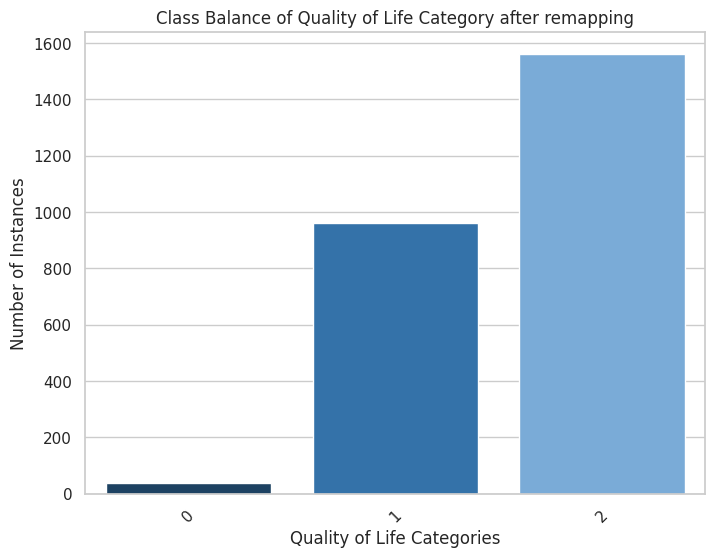

In [28]:
# Define your custom palette with dark blue, dark green, and light green#12436D
custom_palette = sns.color_palette(["#12436D", "#2073BC", "#6BACE6"])  # Dark blue, dark green, light green
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)
plt.title('Class Balance of Quality of Life Category after remapping')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [29]:
cat_df = X.select_dtypes(include=['object'])


In [30]:
from sklearn.model_selection import train_test_split

# X is the feature dataframe and y is the target variable (categorical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Quality of Life Category'], random_state=42)


## Checking the significance of Categorical variables using Chi_Squared Test

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize a list to store the results
chi_square_results = []

# Loop through all categorical variables (assuming X is your data and y is your target variable)
for column in X_train[cat_df.columns].columns:
    if X_train[column].dtype == 'object':  # Check if the column is categorical
        # Create a contingency table for the categorical variable and the response (y)
        contingency_table = pd.crosstab(X_train[column], y_train)

        # Perform the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Append the result for the variable
        chi_square_results.append({
            'Variable': column,
            'Chi2 Statistic': chi2,
            'P-Value': p_value,
            'Significant (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
        })

# Convert the results into a pandas DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Sort the results by p-value for easy identification of significant variables
chi_square_df = chi_square_df.sort_values(by='P-Value')

# Display the table
print(chi_square_df)

                 Variable  Chi2 Statistic        P-Value  \
62  Satisfied With Life 1      607.836078  2.248299e-122   
63  Satisfied With Life 2      576.981938  8.689805e-116   
20  Present Mental Health      411.462298   6.609890e-84   
19         Present Health      284.747768   7.229869e-57   
12       English Speaking      266.544040   1.190316e-54   
..                    ...             ...            ...   
66   Therapist/Counselor         0.000000   1.000000e+00   
36                   COPD        0.000000   1.000000e+00   
64           Psychiatrist        0.000000   1.000000e+00   
34         Kidney Problem        0.000000   1.000000e+00   
33              Hepatitis        0.000000   1.000000e+00   

   Significant (p < 0.05)  
62                    Yes  
63                    Yes  
20                    Yes  
19                    Yes  
12                    Yes  
..                    ...  
66                     No  
36                     No  
64                     No  

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

significant_vars = []

for col in X_train[cat_df.columns].columns:
    contingency_table = pd.crosstab(y, X_train[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:  # Adjust the significance level as needed
        significant_vars.append(col)

print("Significant variables:", significant_vars)


Significant variables: ['Ethnicity', 'Marital Status', 'Full Time Employment', 'Retired', 'Income', 'US Born', 'Primary Language', 'English Speaking', 'English Difficulties', 'Familiarity with America', 'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging', 'Present Health', 'Present Mental Health', 'Present Oral Health', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'Language', 'users', 'Heal Professionals', 'Health Website', 'Satisfied With Life 1', 'Satisfied With Life 2', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'Knowledge', 'Services (AD)', 'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives', 'Have

## Checking the significance of Numerical variables using Kruskal Wallis

In [33]:
import pandas as pd
from scipy.stats import kruskal

# Initialize an empty list to hold significant variables
significant_num = []

# Loop through each numeric variable and perform the Kruskal-Wallis test
for var in df_num:
    grouped = [X_train[var][y == group] for group in sorted(y.unique())]
    stat, p_value = kruskal(*grouped)

    print(f"Variable: {var}")
    print(f"Kruskal-Wallis test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check significance (using alpha = 0.05)
    if p_value < 0.05:
        print(f"{var} is significantly associated with the ordinal response.\n")
        significant_num.append(var)  # Add to significant_num list
    else:
        print(f"{var} is not significantly associated with the ordinal response.\n")

# Display the significant variables
print("Significant numeric variables:", significant_num)

Variable: Age
Kruskal-Wallis test statistic: 18.196205647126533
P-value: 0.00011187785931608364
Age is significantly associated with the ordinal response.

Variable: Education Completed
Kruskal-Wallis test statistic: 46.39854855722465
P-value: 8.407815957179509e-11
Education Completed is significantly associated with the ordinal response.

Variable: Household Size
Kruskal-Wallis test statistic: 1.1485113714206547
P-value: 0.5631238539906636
Household Size is not significantly associated with the ordinal response.

Variable: Duration of Residency
Kruskal-Wallis test statistic: 46.06715993953099
P-value: 9.923007523987634e-11
Duration of Residency is significantly associated with the ordinal response.

Variable: Family Connectivity Score
Kruskal-Wallis test statistic: 7.775734876683675
P-value: 0.020488993522920763
Family Connectivity Score is significantly associated with the ordinal response.

Variable: Friends Connectivity Score
Kruskal-Wallis test statistic: 3.2625248442120234
P-valu

In [34]:
len(significant_vars)+len(significant_num)

102

## Nominal variables

In [35]:
cat_df = significant_vars

In [36]:

#Encoding Yes and No columns into Nominal type 1
nominal_type1 = []
# Iterate through the columns in cat_df
for col in cat_df:
    if (X[col].isin(['Yes', 'No'])).any():  # Check if any entry is 'Yes' or 'No'
        nominal_type1.append(col)

# Print the Type I encoding columns
print(f'Type I encoding:', nominal_type1)

#Encode categories with Other
nominal_type2 = []
for col in cat_df:
    if (X[col] == 'Other').any():
        nominal_type2.append(col)
print(f'type_nominal_1 encoding:',nominal_type2)


Type I encoding: ['Full Time Employment', 'Retired', 'US Born', 'Primary Language', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'users', 'Heal Professionals', 'Health Website', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'District', 'Nursing Home', 'Smoke Detector', 'Recycle', 'Access to a Computer', 'Mobile Devices']
type_nominal_1 encoding: ['Ethnicity', 'Marital Status', 'Housing ', 'Status of Ownership']


## Ordinal Variables

In [37]:
#Encode type I
type1_columns = []
for col in cat_df:
    if (X[col] == 'Pretty much satisfied').any():
        type1_columns.append(col)
print(f'Type II encoding:',type1_columns)

#Encode type II

type2_columns = []
for col in cat_df:
    if (X[col] == 'Rarely').any():
        type2_columns.append(col)
print(f'Type III encoding:',type2_columns)

#Encode type III
type3_columns = []
for col in cat_df:
    if (X[col] == 'Interested').any():
        type3_columns.append(col)
print(f'Type IV encoding:',type3_columns)

#Encode type IV
type4_columns = []
for col in cat_df:
    if (X[col] == 'Very satisfied').any():
        type4_columns.append(col)
print(f'Type V encoding:',type4_columns)

#Encode type V
type5_columns = []
for col in cat_df:
    if (X[col] == 'Excellent').any():
        type5_columns.append(col)
print(f'Type VI encoding:',type5_columns)



Type II encoding: ['Parks and Recs', 'Libraries', 'Public Safety', 'Airport', 'Austin Energy', 'Court', 'Social Services']
Type III encoding: ['Visit Frequency ']
Type IV encoding: ['Informed']
Type V encoding: ['City Effort Satisfaction']
Type VI encoding: ['Present Health', 'Present Mental Health', 'Present Oral Health', 'Place to Live', 'Raising Children', 'Place to Work', 'Small Businesses ', 'Place to Retire', 'Arts and Culture', 'Safety', 'Traffic', 'Qualtiy of Life', 'Quality of Service']


In [38]:
X_train_new =X_train[significant_vars+significant_num]
X_test_new = X_test[significant_vars+significant_num]

In [39]:
'''from lazypredict.Supervised import LazyClassifier

# Instantiate LazyClassifier with updated arguments
clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new
models, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)

print(models)'''

'from lazypredict.Supervised import LazyClassifier\n\n# Instantiate LazyClassifier with updated arguments\nclf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)\n\n# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new\nmodels, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)\n\nprint(models)'

In [40]:
ordinal_cols = type1_columns+type2_columns+type3_columns+type4_columns+type5_columns
nominal_cols = nominal_type1+nominal_type2

identified_cols = ordinal_cols+nominal_cols

# Display columns that are not in the exclude list
no_type_cols = X[cat_df].columns[~X[cat_df].columns.isin(identified_cols)]

In [41]:
cat_col = X.select_dtypes(include=['object'])

In [42]:
cat_col [identified_cols]

Parks and Recs              Libraries            Public Safety  \
0     Pretty much satisfied  Pretty much satisfied               Never used   
1     Pretty much satisfied  Pretty much satisfied    Pretty much satisfied   
2     Pretty much satisfied  Pretty much satisfied    Pretty much satisfied   
3     Pretty much satisfied  Pretty much satisfied    Pretty much satisfied   
4     Pretty much satisfied  Pretty much satisfied    Pretty much satisfied   
...                     ...                    ...                      ...   
2560    Very much satisfied    Very much satisfied      Very much satisfied   
2561    Very much satisfied    Very much satisfied      Very much satisfied   
2562  Pretty much satisfied    Very much satisfied      Very much satisfied   
2563    Very much satisfied  Pretty much satisfied    Pretty much satisfied   
2564  Pretty much satisfied  Pretty much satisfied  Not very much satisfied   

                    Airport            Austin Energy                    Court  \
0                Never used    Pretty much satisfied               Never used   
1     Pretty much satisfied    Pretty much satisfied    Pretty much satisfied   
2     Pretty much satisfied    Pretty much satisfied    Pretty much satisfied   
3     Pretty much satisfied    Pretty much satisfied    Pretty much satisfied   
4     Pretty much satisfied    Pretty much satisfied    Pretty much satisfied   
...                     ...                      ...                      ...   
2560  Pretty much satisfied      Very much satisfied    Pretty much satisfied   
2561  Pretty much satisfied  Not very much satisfied  Not very much satisfied   
2562    Very much satisfied  Not very much satisfied  Not very much satisfied   
2563    Very much satisfied      Very much satisfied      Very much satisfied   
2564  Pretty much satisfied    Pretty much satisfied    Pretty much satisfied   

              Social Services  Visit Frequency              Informed  \
0                  Never used             Never       Not interested   
1       Pretty much satisfied             Never  Somewhat interested   
2       Pretty much satisfied             Never  Somewhat interested   
3       Pretty much satisfied             Never  Somewhat interested   
4       Pretty much satisfied             Never           Interested   
...                       ...               ...                  ...   
2560    Pretty much satisfied             Often           Interested   
2561    Pretty much satisfied             Often  Somewhat interested   
2562  Not very much satisfied  Some of the time       Not interested   
2563      Very much satisfied            Rarely       Not interested   
2564    Pretty much satisfied             Never           Interested   

               City Effort Satisfaction Present Health Present Mental Health  \
0                 Somewhat dissatisfied      Very Good                  Good   
1     Niether satisfied or dissatisfied      Excellent             Excellent   
2     Niether satisfied or dissatisfied      Very Good             Very Good   
3     Niether satisfied or dissatisfied      Excellent             Excellent   
4     Niether satisfied or dissatisfied           Good             Excellent   
...                                 ...            ...                   ...   
2560                 Somewhat satisfied      Very Good             Excellent   
2561                     Very satisfied      Very Good             Very Good   
2562              Somewhat dissatisfied           Good                  Good   
2563                 Somewhat satisfied           Good                  Good   
2564                 Somewhat satisfied      Excellent                  Fair   

     Present Oral Health Place to Live Raising Children Place to Work  \
0                   Good          Good             Good          Good   
1              Excellent          Good             Good          Good   
2              Very Good          Good        

In [43]:
cat_col [no_type_cols]

Income English Speaking English Difficulties  \
0           $0 - $9,999             Well                 Much   
1      $70,000 and over        Very well           Not at all   
2      $70,000 and over             Well                 Much   
3     $50,000 - $59,999        Very well           Not at all   
4      $70,000 and over        Very well           Not at all   
...                 ...              ...                  ...   
2560  $30,000 - $39,999             Well             Not much   
2561  $60,000 - $69,999             Well           Not at all   
2562  $10,000 - $19,999             Well                 Much   
2563  $10,000 - $19,999         Not well                 Much   
2564   $70,000 and over        Very well            Very much   

     Familiarity with America Familiarity with Ethnic Origin  \
0                         Low                      Very high   
1                   Very high                           High   
2                        High                           High   
3                   Very high                            Low   
4                         Low                           High   
...                       ...                            ...   
2560                     High                      Very high   
2561                     High                           High   
2562                     High                           High   
2563                      Low                            Low   
2564                Very high                      Very high   

     Identify Ethnically      Belonging          Language  \
0             Very close  Not very much           English   
1             Very close      Very much           English   
2         Somewhat close  Not very much           English   
3         Not very close  Not very much           English   
4         Not very close  Not very much           English   
...                  ...            ...               ...   
2560      Somewhat close       Somewhat  Eng_Chinese only   
2561          Not at all       Somewhat           English   
2562      Somewhat close       Somewhat           English   
2563      Somewhat close       Somewhat           English   
2564      Somewhat close       Somewhat           English   

          Satisfied With Life 1 Satisfied With Life 2 Knowledge Services (AD)  \
0                      Disagree              Disagree       0.0           0.0   
1                Slightly agree                 Agree       2.0           0.0   
2                Slightly agree                 Agree       0.0           0.0   
3                Strongly agree        Strongly agree       0.0           0.0   
4                         Agree                 Agree       2.0           0.0   
...                         ...                   ...       ...           ...   
2560                      Agree                 Agree       1.0           0.0   
2561  Neither agree or disagree                 Agree       2.0           0.0   
2562                      Agree                 Agree       2.0           0.0   
2563                      Agree                 Agree       3.0           0.0   
2564             Slightly agree        Slightly agree       2.0           0.0   

     Language Barrier (AD) Nursing Home (AD) Advanced Directives  \
0                      0.0               0.0                 0.0   
1                      0.0               0.0                 0.0   
2                      0.0               0.0                 0.0   
3                      0.0               0.0                 0.0   
4                      0.0               1.0                 1.0   
...                    ...               ...                 ...   
2560                   0.0               0.0                 0.0   
2561                   0.0               0.0                 0.0   
2562                   0.0               0.0                 1.0   
2563                   0.0               0.0                 1.0   
2564         

In [44]:
rem = cat_col [no_type_cols].columns
rem

Index(['Income', 'English Speaking', 'English Difficulties',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Belonging', 'Language', 'Satisfied With Life 1',
       'Satisfied With Life 2', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition',
       'Satisfaction With Housing.', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General',
       'Awareness of Services', 'Civic Engagement'],
      dtype='object')

In [45]:
nominal_type3 = ['Language', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Awareness of Services', 'Civic Engagement']

In [46]:
difference = np.setdiff1d(rem, nominal_type3)
cat_col[difference]

Belonging English Difficulties English Speaking  \
0     Not very much                 Much             Well   
1         Very much           Not at all        Very well   
2     Not very much                 Much             Well   
3     Not very much           Not at all        Very well   
4     Not very much           Not at all        Very well   
...             ...                  ...              ...   
2560       Somewhat             Not much             Well   
2561       Somewhat           Not at all             Well   
2562       Somewhat                 Much             Well   
2563       Somewhat                 Much         Not well   
2564       Somewhat            Very much        Very well   

     Familiarity with America Familiarity with Ethnic Origin  \
0                         Low                      Very high   
1                   Very high                           High   
2                        High                           High   
3                   Very high                            Low   
4                         Low                           High   
...                       ...                            ...   
2560                     High                      Very high   
2561                     High                           High   
2562                     High                           High   
2563                      Low                            Low   
2564                Very high                      Very high   

     Identify Ethnically             Income Satisfaction With Housing.  \
0             Very close        $0 - $9,999                Pretty much   
1             Very close   $70,000 and over                Pretty much   
2         Somewhat close   $70,000 and over                Pretty much   
3         Not very close  $50,000 - $59,999                Pretty much   
4         Not very close   $70,000 and over                  Very much   
...                  ...                ...                        ...   
2560      Somewhat close  $30,000 - $39,999                Pretty much   
2561          Not at all  $60,000 - $69,999                  Very much   
2562      Somewhat close  $10,000 - $19,999                  Very much   
2563      Somewhat close  $10,000 - $19,999                Pretty much   
2564      Somewhat close   $70,000 and over                  Very much   

          Satisfied With Life 1 Satisfied With Life 2  
0                      Disagree              Disagree  
1                Slightly agree                 Agree  
2                Slightly agree                 Agree  
3                Strongly agree        Strongly agree  
4                         Agree                 Agree  
...                         ...                   ...  
2560                      Agree                 Agree  
2561  Neither agree or disagree                 Agree  
2562                      Agree                 Agree  
2563                      Agree                 Agree  
2564             Slightly agree        Slightly agree  

[2565 rows x 10 columns]

In [47]:
cat_col[difference].columns

Index(['Belonging', 'English Difficulties', 'English Speaking',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Income', 'Satisfaction With Housing.',
       'Satisfied With Life 1', 'Satisfied With Life 2'],
      dtype='object')

In [48]:
for col in difference:
    print(cat_col [col].value_counts())

Belonging
Somewhat         1286
Very much         755
Not very much     441
Not at all         83
Name: count, dtype: int64
English Difficulties
Not at all    796
Not much      723
Much          541
Very much     505
Name: count, dtype: int64
English Speaking
Very well     980
Well          798
Not well      619
Not at all    168
Name: count, dtype: int64
Familiarity with America
High         1249
Low           709
Very high     490
Very low      117
Name: count, dtype: int64
Familiarity with Ethnic Origin
High         1374
Very high     854
Low           288
Very low       49
Name: count, dtype: int64
Identify Ethnically
Somewhat close    1228
Very close        1023
Not very close     286
Not at all          28
Name: count, dtype: int64
Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,999     202
$20,000 - $29,999     195
$60,000 - $69,999     190
$50,000 - $59,999     177
$40,000 - $49,999     177
Name: count, dtype: int64
Satisfactio

In [49]:
type6_columns=['English Difficulties']
type7_columns= ['English Speaking']
type8_columns=['Familiarity with America', 'Familiarity with Ethnic Origin']
type9_columns=['Identify Ethnically']
type10_columns=['Income']
type11_columns= ['Satisfied With Life 1', 'Satisfied With Life 2']
type12_columns=['Belonging']
type13_columns=['Satisfaction With Housing.']

In [50]:
# Define custom orders for each categorical column
custom_orders = {
    'type1_columns': ['Pretty much satisfied', 'Very much satisfied', 'Never used', 'Not very much satisfied', 'Not at all satisfied'],
    'type2_columns': ['Never', 'Rarely', 'Some of the time', 'Often'],
    'type3_columns': ['Not interested at all', 'Not interested', 'Somewhat interested', 'Interested', 'Very interested'],
    'type4_columns': ['Niether satisfied or dissatisfied', 'Somewhat dissatisfied', 'Somewhat satisfied', 'Very dissatisfied', 'Very satisfied'],
    'type5_columns': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    'type6_columns': ['Not at all', 'Not much', 'Much', 'Very much'],
    'type7_columns': ['Not at all','Well','Not well','Very well'],
    'type8_columns': ['Very low','Low','High','Very high'],
    'type9_columns': ['Not at all','Not very close', 'Somewhat close', 'Very close'],
    'type10_columns': ['$0 - $9,999', '$10,000 - $19,999', '$20,000 - $29,999',  '$30,000 - $39,999', '$40,000 - $49,999', '$50,000 - $59,999', '$60,000 - $69,999' '$70,000 and over'],
    'type11_columns': ['Strongly disagree','Disagree','Slightly disagree','Neither agree or disagree','Slightly agree','Agree','Strongly agree'],
    'type12_columns': ['Not at all', 'Not very much', 'Somewhat', 'Very much'],
    'type13_columns': ['Not at all', 'Not very much', 'Pretty much', 'Very much']
}


In [51]:
X_test.head(4)

Age  Gender     Ethnicity         Marital Status  Education Completed  \
870   26.0    Male  Asian Indian  Living with a partner                 17.0   
1130  85.0  Female  Asian Indian                 Single                  5.0   
1438  25.0    Male        Korean                Married                 14.0   
1512  22.0  Female        Korean                 Single                 14.0   

      Household Size Household Category Full Time Employment  \
870              2.0             Family                  Yes   
1130             3.0             Family                   No   
1438             2.0             Family                  Yes   
1512             2.0             Family                   No   

     Part Time Employment Student Homemaker Retired             Income  \
870                    No      No        No      No   $70,000 and over   
1130                   No      No        No     Yes        $0 - $9,999   
1438                   No      No        No      No  $60,000 - $69,999   
1512                  Yes     Yes        No      No        $0 - $9,999   

     US Born  Duration of Residency Primary Language English Speaking  \
870       No                    4.0              Yes             Well   
1130      No                   35.0              Yes         Not well   
1438      No                    8.0              Yes             Well   
1512      No                   10.0               No        Very well   

     English Difficulties Familiarity with America  \
870                  Much                      Low   
1130                 Much                      Low   
1438             Not much                     High   
1512           Not at all                     High   

     Familiarity with Ethnic Origin Identify Ethnically      Belonging  \
870                            High      Somewhat close       Somewhat   
1130                           High      Somewhat close       Somewhat   
1438                            Low          Very close       Somewhat   
1512                           High      Somewhat close  Not very much   

     Discrimination  Present Health Present Mental Health Present Oral Health  \
870               No           Good                  Good                Good   
1130              No           Fair                  Fair                Fair   
1438              No           Good             Very Good                Good   
1512             Yes      Very Good             Very Good                Fair   

     Hygiene Assistance Smoking Drinking Regular Exercise Healthy Diet  \
870                  No      No       No               No          Yes   
1130                Yes      No       No              Yes          Yes   
1438                 No      No       No               No          Yes   
1512                 No      No       No              Yes          Yes   

     Hypertension Heart Disease Stroke Diabetes Cancer Arthritis Hepatitis  \
870             0            No     No        0     No         0        No   
1130          Yes            No     No        0     No       Yes        No   
1438            0            No     No        0     No         0        No   
1512            0            No     No        0     No         0        No   

     Kidney Problem Asthma COPD Physical Check-up Dentist Check-up Urgentcare  \
870              No     No   No                 0                0          0   
1130             No     No   No               Yes                0        Yes   
1438             No     No   No                 0                0          0   
1512             No     No   No               Yes              Yes          0   

     Folkmedicine Primary Care Health Insurance Dental Insurance  \
870             0            0              Yes              Yes   
1130            0          Yes              Yes                0   
1438            0            0                0                0   
1512            0          Yes              Yes             

In [52]:
X_test[type2_columns].columns

Index(['Visit Frequency '], dtype='object')

In [53]:
df_nominal = nominal_type1+nominal_type2+nominal_type3

In [54]:
custom_orders['type2_columns']

['Never', 'Rarely', 'Some of the time', 'Often']

In [55]:
X_train.shape

(2052, 146)

In [56]:
X_train.dropna()
X_train.shape

(2052, 146)

In [57]:
df_ordinal = type1_columns + type2_columns+type3_columns+type4_columns+type5_columns+type6_columns+type7_columns+type8_columns+type9_columns+type10_columns+type11_columns+type12_columns+type13_columns
len(df_ordinal) ,len(df_nominal)

(33, 57)

### Handling Imbalance of the response variable using SMOTENC

## EDA

In [60]:
X_train

Age  Gender     Ethnicity         Marital Status  Education Completed  \
1700  46.0    Male    Vietnamese                Married                 16.0   
1739  32.0  Female    Vietnamese                Married                 16.0   
1766  20.0    Male    Vietnamese                 Single                 11.0   
2046  48.0  Female    Vietnamese                Married                 12.0   
1675  45.0    Male        Korean                Married                 17.0   
...    ...     ...           ...                    ...                  ...   
330   32.0    Male       Chinese                Married                 17.0   
638   73.0    Male       Chinese                Married                 17.0   
1567  70.0  Female        Korean                Married                 12.0   
2537  47.0    Male         Other  Living with a partner                  9.0   
973   32.0    Male  Asian Indian                Married                 16.0   

      Household Size Household Category Full Time Employment  \
1700             4.0             Family                   No   
1739             4.0             Family                  Yes   
1766             6.0             Family                   No   
2046             5.0             Family                  Yes   
1675             3.0             Family                   No   
...              ...                ...                  ...   
330              2.0             Family                  Yes   
638              2.0             Family                   No   
1567             2.0             Family                   No   
2537             4.0             Family                  Yes   
973              4.0             Family                  Yes   

     Part Time Employment Student Homemaker Retired             Income  \
1700                   No      No        No      No  $40,000 - $49,999   
1739                   No      No        No      No  $20,000 - $29,999   
1766                  Yes     Yes        No      No  $40,000 - $49,999   
2046                   No      No        No      No  $40,000 - $49,999   
1675                   No     Yes        No      No  $40,000 - $49,999   
...                   ...     ...       ...     ...                ...   
330                    No      No        No      No  $10,000 - $19,999   
638                    No      No        No     Yes   $70,000 and over   
1567                   No      No       Yes      No  $30,000 - $39,999   
2537                   No      No        No      No  $60,000 - $69,999   
973                    No      No        No      No   $70,000 and over   

     US Born  Duration of Residency Primary Language English Speaking  \
1700      No                   35.0               No             Well   
1739      No                    2.0               No        Very well   
1766      No                    2.0              Yes         Not well   
2046      No                   20.0               No         Not well   
1675      No                    8.0              Yes             Well   
...      ...                    ...              ...              ...   
330       No                   12.0              Yes             Well   
638       No                   40.0              Yes        Very well   
1567      No                   34.0              Yes         Not well   
2537     Yes                   47.0               No        Very well   
973       No                    3.0              Yes        Very well   

     English Difficulties Familiarity with America  \
1700                 Much                Very high   
1739            Very much                Very high   
1766            Very much                      Low   
2046             Not much                     High   
1675             Not much                      Low   
...                   ...                      ...   
330              Not much                     High   
638            Not at all                     High   
1567                 Much

In [61]:
y_train

1700    1
1739    2
1766    0
2046    2
1675    1
       ..
330     1
638     2
1567    2
2537    1
973     2
Name: Quality of Life Category, Length: 2052, dtype: int64

In [62]:
X_train.dtypes




Age                       float64
Gender                     object
Ethnicity                  object
Marital Status             object
Education Completed       float64
                           ...   
Non-city-based Ethnic      object
Non-city-based General     object
Mode of Transport          object
Awareness of Services      object
Civic Engagement           object
Length: 146, dtype: object

In [63]:
# Catergorical Variables in X_train
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_cols

Index(['Gender', 'Ethnicity', 'Marital Status', 'Household Category',
       'Full Time Employment', 'Part Time Employment', 'Student', 'Homemaker',
       'Retired', 'Income',
       ...
       'Home Phone', 'Informed', 'City Effort Satisfaction', '3-1-1_9-1-1',
       'City-based', 'Non-city-based Ethnic', 'Non-city-based General',
       'Mode of Transport', 'Awareness of Services', 'Civic Engagement'],
      dtype='object', length=132)

In [64]:
# NUMERICAL Variables in X_train
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Age', 'Education Completed', 'Household Size', 'Duration of Residency',
       'Family Connectivity Score', 'Friends Connectivity Score',
       'Religious Connectivity Score', 'Family Relationship Score',
       'Family Values Score', 'Family Expression Score',
       'Family Dynamics Score', 'Community Engagement Score',
       'Community Trust Score', 'Residency '],
      dtype='object')

In [ ]:
# HEATMAP-CTS VARS

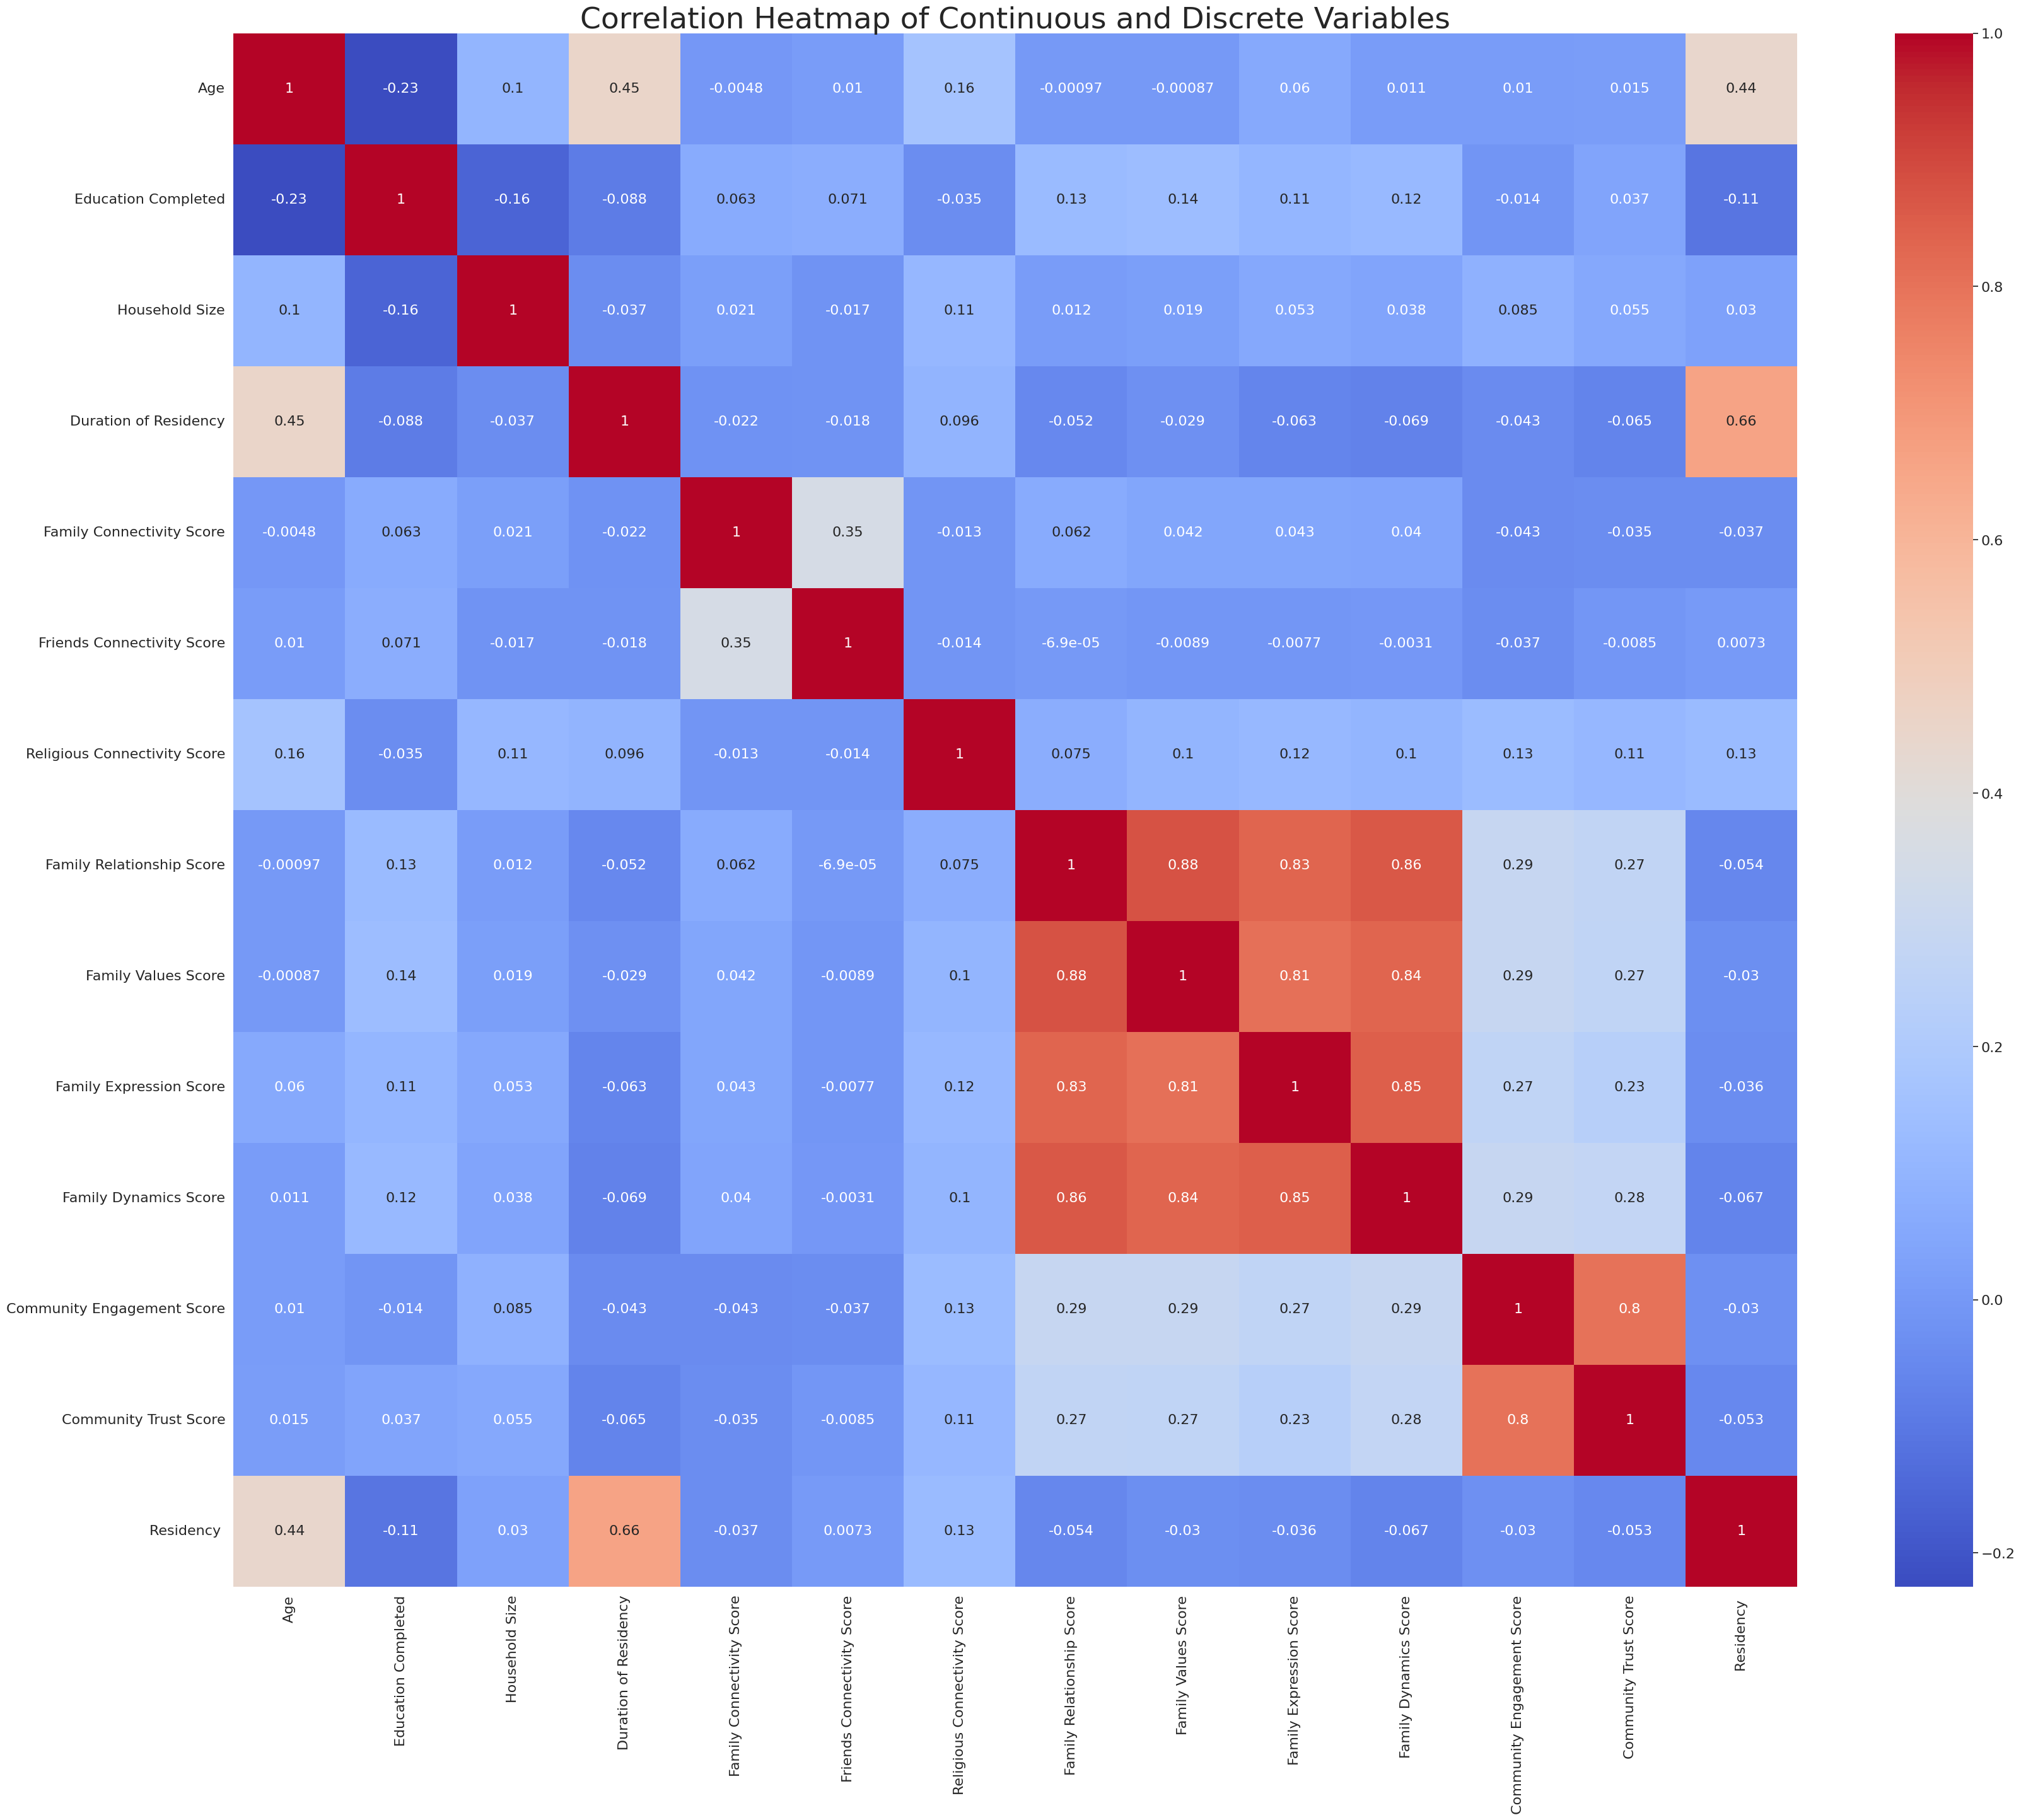

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context to increase font size
sns.set_context("notebook", rc={"font.size": 30, "axes.titlesize": 34, "axes.labelsize": 30,
                                  "xtick.labelsize": 16, "ytick.labelsize": 16})

# Combine the numerical and discrete variables into one list
combined_vars = num_cols
# Subset the DataFrame to include only the combined variables
subset_train = df[combined_vars]

# Calculate the correlation matrix for the subset of continuous and discrete variables
correlation_matrix = subset_train.corr()

# Create the heatmap with a specified color map
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, fmt='.2g', annot=True, annot_kws={"size": 16}, cmap='coolwarm')  # Change 'coolwarm' to your preferred colormap
plt.title('Correlation Heatmap of Continuous and Discrete Variables')
plt.show()


In [70]:
X[cat_cols]

Gender     Ethnicity Marital Status Household Category  \
0     Female       Chinese         Single             Family   
1     Female  Asian Indian        Married             Family   
2       Male  Asian Indian        Married             Family   
3       Male  Asian Indian         Single              Alone   
4     Female  Asian Indian         Single             Family   
...      ...           ...            ...                ...   
2560  Female         Other         Single             Family   
2561    Male         Other        Married             Family   
2562  Female      Filipino         Single             Family   
2563    Male      Filipino         Single             Family   
2564  Female      Filipino         Single             Family   

     Full Time Employment Part Time Employment Student Homemaker Retired  \
0                      No                   No      No        No      No   
1                     Yes                   No      No        No      No   
2                     Yes                   No      No        No      No   
3                     Yes                   No      No        No      No   
4                      No                   No      No        No     Yes   
...                   ...                  ...     ...       ...     ...   
2560                   No                   No      No        No     Yes   
2561                   No                   No      No        No     Yes   
2562                   No                   No      No        No      No   
2563                  Yes                   No      No        No      No   
2564                   No                  Yes     Yes        No      No   

                 Income US Born Primary Language English Speaking  \
0           $0 - $9,999      No              Yes             Well   
1      $70,000 and over      No              Yes        Very well   
2      $70,000 and over      No               No             Well   
3     $50,000 - $59,999      No               No        Very well   
4      $70,000 and over      No              Yes        Very well   
...                 ...     ...              ...              ...   
2560  $30,000 - $39,999      No              Yes             Well   
2561  $60,000 - $69,999      No              Yes             Well   
2562  $10,000 - $19,999      No              Yes             Well   
2563  $10,000 - $19,999      No              Yes         Not well   
2564   $70,000 and over     Yes               No        Very well   

     English Difficulties Familiarity with America  \
0                    Much                      Low   
1              Not at all                Very high   
2                    Much                     High   
3              Not at all                Very high   
4              Not at all                      Low   
...                   ...                      ...   
2560             Not much                     High   
2561           Not at all                     High   
2562                 Much                     High   
2563                 Much                      Low   
2564            Very much                Very high   

     Familiarity with Ethnic Origin Identify Ethnically      Belonging  \
0                         Very high          Very close  Not very much   
1                              High          Very close      Very much   
2                              High      Somewhat close  Not very much   
3                               Low      Not very close  Not very much   
4                              High      Not very close  Not very much   
...                             ...                 ...            ...   
2560                      Very high      Somewhat close       Somewhat   
2561                           High          Not at all       Somewhat   
2562                           High      Somewhat close       Somewhat   
2563                            Low      Somewhat close       Somewhat   
2564                      Very h

In [71]:
y

0       2
1       1
2       2
3       2
4       2
       ..
2560    2
2561    2
2562    1
2563    1
2564    2
Name: Quality of Life Category, Length: 2565, dtype: int64

In [73]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan  # Return NaN for invalid tables
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


<ipython-input-74-0d044a682b8c>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramers_v_matrix.fillna(0, inplace=True)


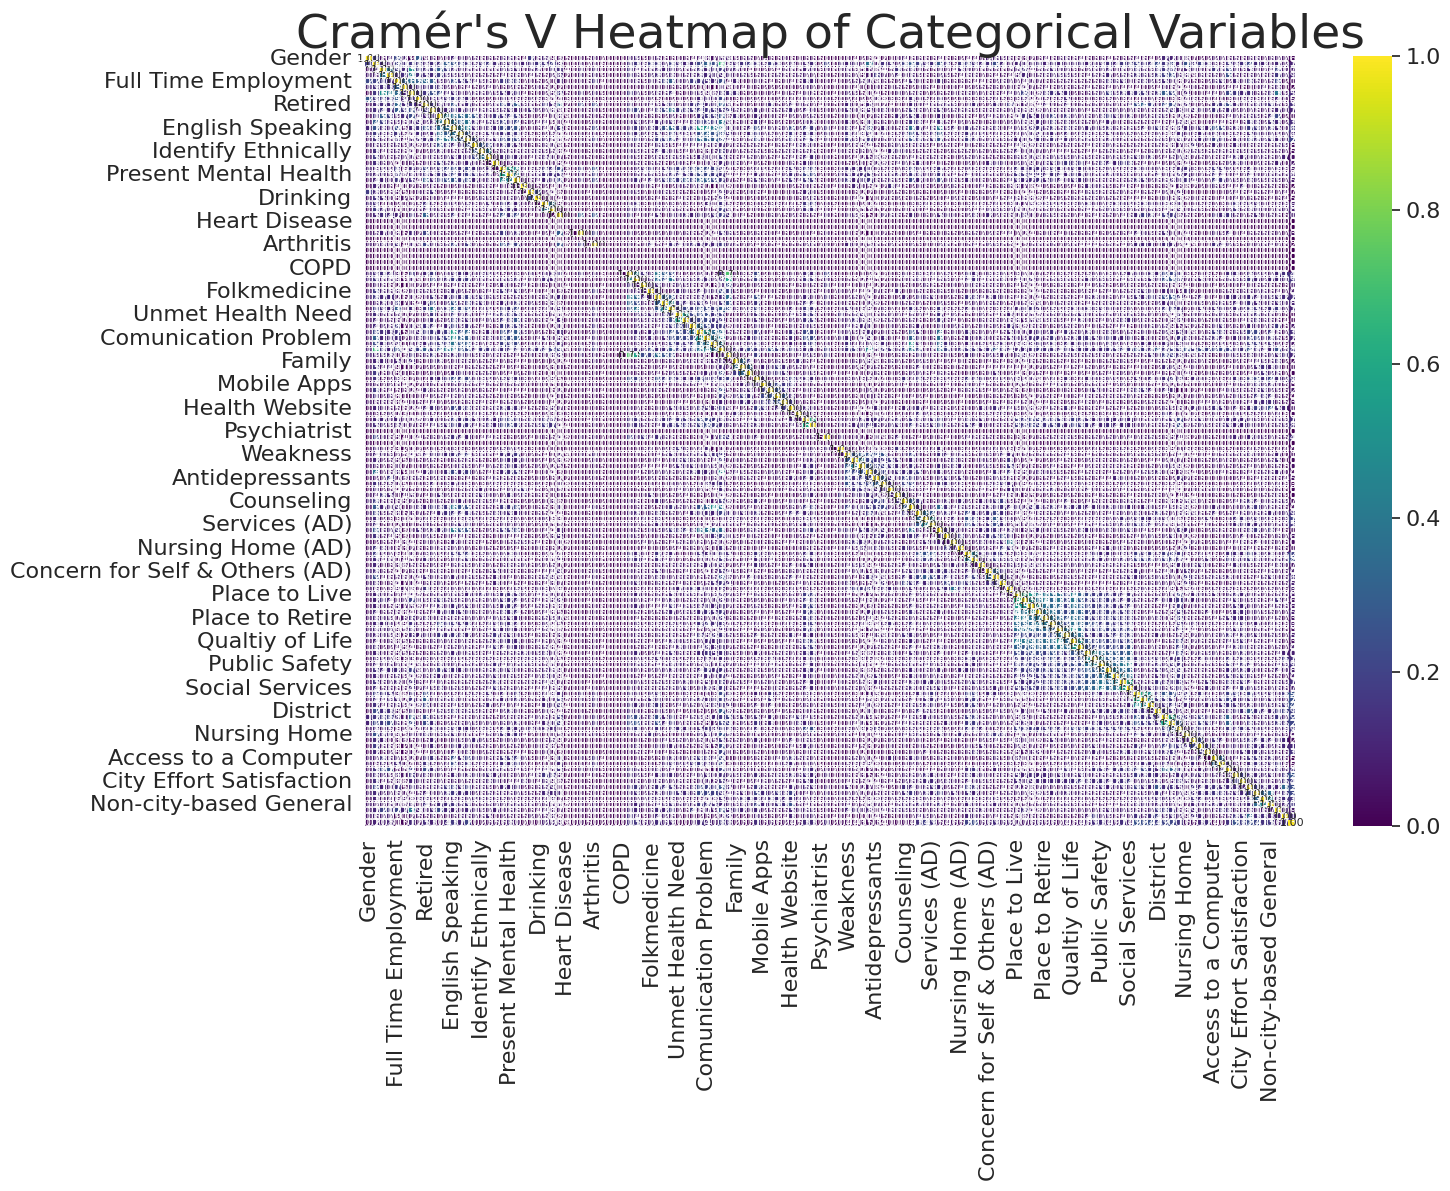

In [74]:
# Create a Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramers_v_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])

# Replace NaN values with 0
cramers_v_matrix.fillna(0, inplace=True)

# Convert the Cramér's V matrix to float type
cramers_v_matrix = cramers_v_matrix.astype(float)

# Create a heatmap to visualize Cramér's V matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f',
            annot_kws={"size": 8})  # Adjust the size here
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()


In [80]:
# Create a list to store variable pairs and their Cramér's V values
cramers_v_values = []

# Loop through the Cramér's V matrix to find pairs and their values
for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        if i != j:  # Avoid comparing the same variable
            cramers_v_values.append((categorical_vars[i], categorical_vars[j], cramers_v_matrix.iloc[i, j]))

# Convert the list to a DataFrame
cramers_v_df = pd.DataFrame(cramers_v_values, columns=['Variable 1', 'Variable 2', 'Cramér\'s V'])

# Sort the DataFrame by Cramér's V values in descending order
top_associations = cramers_v_df.sort_values(by='Cramér\'s V', ascending=False).head(100)

# Print the top 10 associated categorical variables
print(top_associations)


                     Variable 1                Variable 2  Cramér's V
6718                      users         Physical Check-up    0.714980
4897          Physical Check-up                     users    0.714980
180                   Ethnicity                  Language    0.664559
6551                   Language                 Ethnicity    0.664559
12144             Place to Live          Raising Children    0.613187
...                         ...                       ...         ...
1620           English Speaking                Preferance    0.393035
12282          Raising Children           Qualtiy of Life    0.392265
13193           Qualtiy of Life          Raising Children    0.392265
1846   Familiarity with America          English Speaking    0.390995
1585           English Speaking  Familiarity with America    0.390995

[100 rows x 3 columns]


In [80]:
# Univariate Analysis


In [91]:
variables = [
    "Home Phone",
    "Mobile Devices",
    "Libraries",
    "Access to a Computer",
    "Parks and Recs",
    "Smoke Detector",
    "Ethnicity",
    "Public Safety",
    "City Effort Satisfaction",
    "Language",
    "Nursing Home",
    "Student",
    "Hypertension",
    "Age",
    "Full Time Employment",
    "Homemaker",
    "Raising Children",
    "Informed",
    "Household Category"
]

In [92]:
for i in  variables:
    print(i)
    a=X[i].value_counts()
    print(a)
    print()

Home Phone
Home Phone
No     1443
Yes    1122
Name: count, dtype: int64

Mobile Devices
Mobile Devices
Yes    2469
No       96
Name: count, dtype: int64

Libraries
Libraries
Pretty much satisfied      1318
Very much satisfied         685
Never used                  400
Not very much satisfied     139
Not at all satisfied         23
Name: count, dtype: int64

Access to a Computer
Access to a Computer
Yes    2440
No      125
Name: count, dtype: int64

Parks and Recs
Parks and Recs
Pretty much satisfied      1436
Very much satisfied         726
Not very much satisfied     193
Never used                  186
Not at all satisfied         24
Name: count, dtype: int64

Smoke Detector
Smoke Detector
Yes    2349
No      216
Name: count, dtype: int64

Ethnicity
Ethnicity
Chinese         630
Asian Indian    568
Vietnamese      495
Korean          467
Filipino        262
Other           143
Name: count, dtype: int64

Public Safety
Public Safety
Pretty much satisfied      1314
Very much satisfied  